In [280]:
import numpy as np
import matplotlib.pyplot as plt
!pip install tabulate
from tabulate import tabulate

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/home/tsexos/jupyter/environment/bin/python -m pip install --upgrade pip' command.


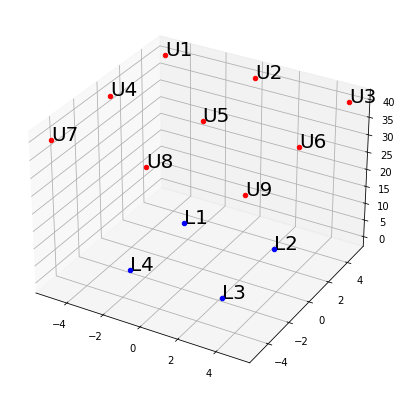

In [281]:
##Case of 10 working detectors with big layer on top.

#You only change the h,units of cm
h=40


U=np.array([[-5,5,h],[0,5,h],[5,5,h],[-5,0,h],[0,0,h],[5,0,h],[-5,-5,h],[0,-5,h],[5,-5,h]])
Ux=np.array([-5,0,5,-5,0,5,-5,0,5])
Uy=np.array([5,5,5,0,0,0,-5,-5,-5])

L=np.array([[-2.5,2.5,0],[2.5,2.5,0],[2.5,-2.5,0],[-2.5,-2.5,0]])
Lx=np.array([-2.5,2.5,2.5,-2.5])
Ly=np.array([2.5,2.5,-2.5,-2.5])

#Plot of the pixels centers:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
n=[1,2,3,4,5,6,7,8,9]
for i in range (9):
    ax.scatter(Ux[i],Uy[i],h,c='red')
    ax.text(Ux[i],Uy[i],h,  '%s' % ("U"+str(i+1)), size=20, zorder=1,color='k') 
for i in range(4):
    ax.scatter(Lx[i],Ly[i],0,c='blue')
    ax.text(Lx[i],Ly[i],0,  '%s' % ("L"+str(i+1)), size=20, zorder=1,color='k') 

In [282]:
def det10_angle_1(h):
    print("For height:",h," cm")
    theta=np.zeros((9,4))
    phi=np.zeros((9,4))
    theta_max=np.arctan(np.sqrt((Ux[0]-Lx[3]+2.5+2.5)**2+(Uy[0]-Ly[3]+2.5+2.5)**2)/h)*(180/np.pi)

    print("Maximum theta measured (in degrees):",theta_max ,"\n \n")

    for i in range(9):
        for j in range(4):
            r=np.sqrt((Ux[i]-Lx[j])**2+(Uy[i]-Ly[j])**2)
            theta[i,j]=np.around(np.arctan(r/h)*(180/np.pi),2)
            phi[i,j]=np.around(np.arctan(-(Uy[i]-Ly[j])/(Ux[i]-Lx[j]))*(180/np.pi))
            if (i==1) :
                phi[i,j]=-phi[i,j]+90
            elif (i==2) or (i==5) or (i==8):
                phi[i,j]=phi[i,j]+180
            elif i==1:
                phi[i,j]=phi[i,j]+90
            elif i==7:
                phi[i,j]=phi[i,j]+270
            elif (i==4) and (j==0 or j==1):
                phi[i,j]=-phi[i,j]+270
            elif (i==4) and (j==3):
                phi[i,j]=-phi[i,j]+90
            elif phi[i,j]<0:
                phi[i,j]=-phi[i,j]

    phi=phi.astype(int)

    table1 = [["Pixel_1",theta[0,0],theta[0,1],theta[0,2],theta[0,3]],
         ["Pixel_2",theta[1,0],theta[1,1],theta[1,2],theta[1,3]],
         ["Pixel_3",theta[2,0],theta[2,1],theta[2,2],theta[2,3]],
         ["Pixel_4",theta[3,0],theta[3,1],theta[3,2],theta[3,3]],
        ["Pixel_5",theta[4,0],theta[4,1],theta[4,2],theta[4,3]],
         ["Pixel_6",theta[5,0],theta[5,1],theta[5,2],theta[5,3]],
         ["Pixel_7",theta[6,0],theta[6,1],theta[6,2],theta[6,3]],
        ["Pixel_8",theta[7,0],theta[7,1],theta[7,2],theta[7,3]],
         ["Pixel_9",theta[8,0],theta[8,1],theta[8,2],theta[8,3]]]

    print(" Theta measurements (in degrees) for different pixel triggered: \n")
    print(tabulate(table1, headers=["Up Pixels","Low pixel 1", "Low pixel 2","Low pixel 3","Low pixel 4"]))

    print("\n Azimuthal measurements (in degrees) for different pixel triggered: \n")
    table = [["Pixel_1",phi[0,0],phi[0,1],phi[0,2],phi[0,3]],
         ["Pixel_2",phi[1,0],phi[1,1],phi[1,2],phi[1,3]],
         ["Pixel_3",phi[2,0],phi[2,1],phi[2,2],phi[2,3]],
         ["Pixel_4",phi[3,0],phi[3,1],phi[3,2],phi[3,3]],
        ["Pixel_5",phi[4,0],phi[4,1],phi[4,2],phi[4,3]],
         ["Pixel_6",phi[5,0],phi[5,1],phi[5,2],phi[5,3]],
         ["Pixel_7",phi[6,0],phi[6,1],phi[6,2],phi[6,3]],
        ["Pixel_8",phi[7,0],phi[7,1],phi[7,2],phi[7,3]],
         ["Pixel_9",phi[8,0],phi[8,1],phi[8,2],phi[8,3]]]

    print(tabulate(table, headers=["Up Pixels","Low pixel 1", "Low pixel 2","Low pixel 3","Low pixel 4"]))
    print("\n \n")
    return 0
    
det10_angle_1(40)

For height: 40  cm
Maximum theta measured (in degrees): 17.676493644843124 
 

 Theta measurements (in degrees) for different pixel triggered: 

Up Pixels      Low pixel 1    Low pixel 2    Low pixel 3    Low pixel 4
-----------  -------------  -------------  -------------  -------------
Pixel_1               5.05          11.18          14.85          11.18
Pixel_2               5.05           5.05          11.18          11.18
Pixel_3              11.18           5.05          11.18          14.85
Pixel_4               5.05          11.18          11.18           5.05
Pixel_5               5.05           5.05           5.05           5.05
Pixel_6              11.18           5.05           5.05          11.18
Pixel_7              11.18          14.85          11.18           5.05
Pixel_8              11.18          11.18           5.05           5.05
Pixel_9              14.85          11.18           5.05          11.18

 Azimuthal measurements (in degrees) for different pixel trigg

0

Text(0, 0, 'Low')

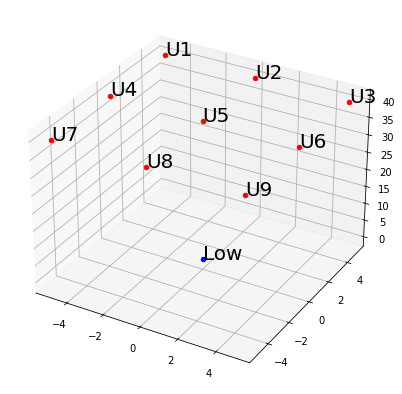

In [283]:
##Case of 7 working detectors with big layer on top.

#You only change the h,units of cm
h=40


U=np.array([[-5,5,h],[0,5,h],[5,5,h],[-5,0,h],[0,0,h],[5,0,h],[-5,-5,h],[0,-5,h],[5,-5,h]])
Ux=np.array([-5,0,5,-5,0,5,-5,0,5])
Uy=np.array([5,5,5,0,0,0,-5,-5,-5])

#Plot of the pixels centers:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
n=[1,2,3,4,5,6,7,8,9]
for i in range (9):
    ax.scatter(Ux[i],Uy[i],h,c='red')
    ax.text(Ux[i],Uy[i],h,  '%s' % ("U"+str(i+1)), size=20, zorder=1,color='k') 

ax.scatter(0,0,0,c='blue')
ax.text(0,0,0,  '%s' % ("Low"), size=20, zorder=1,color='k') 

In [284]:
def det7_angle(h):
    print("For height:",h,"cm")
    U=np.array([[-5,5,h],[0,5,h],[5,5,h],[-5,0,h],[0,0,h],[5,0,h],[-5,-5,h],[0,-5,h],[5,-5,h]])
    Ux=np.array([-5,0,5,-5,0,5,-5,0,5])
    Uy=np.array([5,5,5,0,0,0,-5,-5,-5])

    theta=np.zeros(9)
    phi=np.zeros(9)
    theta_max=np.arctan(np.sqrt((Ux[0]+2.5+2.5)**2+(Uy[0]+2.5+2.5)**2)/h)*(180/np.pi)


    print("Maximum theta measured (in degrees):",theta_max,"\n \n")

    for i in range(9):
        r=np.sqrt((Ux[i])**2+(Uy[i])**2)
        theta[i]=np.around(np.arctan(r/h)*(180/np.pi),2)
    
    phi[0]=135
    phi[1]=90
    phi[2]=45
    phi[3]=180
    phi[4]=0
    phi[5]=0
    phi[6]=315
    phi[7]=270
    phi[8]=225
    
    from tabulate import tabulate

    table1 = [["Theta:",theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],theta[7],theta[8]]]

    print(" Theta measurements (in degrees) for different pixel triggered: \n")
    print(tabulate(table1, headers=["-----------","Pixel 1","Pixel 2","Pixel 3","Pixel 4", "Pixel 5","Pixel 6","Pixel 7","Pixel 8", "Pixel 9"]))

    print("\n Azimuthal measurements (in degrees) for different pixel triggered: \n")
    table = [["Phi:",phi[0],phi[1],phi[2],phi[3],phi[4],phi[5],phi[6],phi[7],phi[8]]]

    print(tabulate(table, headers=["-----------","Pixel 1","Pixel 2","Pixel 3","Pixel 4", "Pixel 5","Pixel 6","Pixel 7","Pixel 8", "Pixel 9"]))
    
    print("\n \n")

In [285]:
det7_angle(5)
det7_angle(10)
det7_angle(20)
det7_angle(40)
det7_angle(60)
det7_angle(80)
det7_angle(100)

For height: 5 cm
Maximum theta measured (in degrees): 63.43494882292201 
 

 Theta measurements (in degrees) for different pixel triggered: 

-----------      Pixel 1    Pixel 2    Pixel 3    Pixel 4    Pixel 5    Pixel 6    Pixel 7    Pixel 8    Pixel 9
-------------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------
Theta:             54.74         45      54.74         45          0         45      54.74         45      54.74

 Azimuthal measurements (in degrees) for different pixel triggered: 

-----------      Pixel 1    Pixel 2    Pixel 3    Pixel 4    Pixel 5    Pixel 6    Pixel 7    Pixel 8    Pixel 9
-------------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------
Phi:                 135         90         45        180          0          0        315        270        225

 

For height: 10 cm
Maximum theta measured (in degrees): 45.0 
 

 Theta measurements (in degrees) for diff

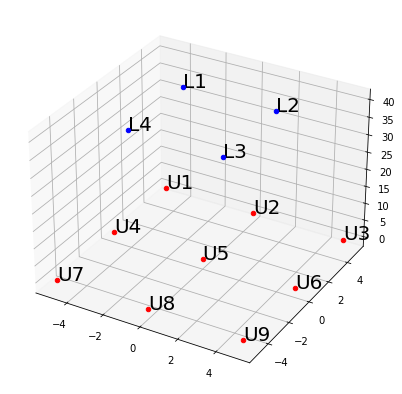

In [286]:
##Case of 10 working detectors with small layer on top.

#You only change the h,units of cm
h=40


U=np.array([[-5,5,0],[0,5,0],[5,5,0],[-5,0,0],[0,0,0],[5,0,0],[-5,-5,0],[0,-5,0],[5,-5,0]])
Ux=np.array([-5,0,5,-5,0,5,-5,0,5])
Uy=np.array([5,5,5,0,0,0,-5,-5,-5])

L=np.array([[-2.5,2.5,h],[2.5,2.5,h],[2.5,-2.5,h],[-2.5,-2.5,h]])
Lx=np.array([-2.5,2.5,2.5,-2.5])
Ly=np.array([2.5,2.5,-2.5,-2.5])

#Plot of the pixels centers:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
n=[1,2,3,4,5,6,7,8,9]
for i in range (9):
    ax.scatter(Ux[i],Uy[i],0,c='red')
    ax.text(Ux[i],Uy[i],0,  '%s' % ("U"+str(i+1)), size=20, zorder=1,color='k') 
for i in range(4):
    ax.scatter(Lx[i],Ly[i],h,c='blue')
    ax.text(Lx[i],Ly[i],h,  '%s' % ("L"+str(i+1)), size=20, zorder=1,color='k') 


In [287]:
def det10_angle_2(h): 
    print("For height:",h,"cm")
    theta=np.zeros((4,9))
    phi=np.zeros((4,9))
    theta_max=np.arctan(np.sqrt((Ux[0]-Lx[3]+2.5+2.5)**2+(Uy[0]-Ly[3]+2.5+2.5)**2)/h)*(180/np.pi)
    print("Maximum theta measured(in degrees):",theta_max,"\n \n")

    for i in range(4):
        for j in range(9):
            r=np.sqrt((Ux[j]-Lx[i])**2+(Uy[j]-Ly[i])**2)
            theta[i,j]=np.around(np.arctan(r/h)*(180/np.pi),2)
            phi[i,j]=np.around(np.arctan((Uy[j]-Ly[i])/(Ux[j]-Lx[i]))*(180/np.pi))
            if (j==1):
                phi[i,j]=-phi[i,j]+90
            if (j==2) or (j==5) or (j==8):
                phi[i,j]=phi[i,j]+180
            elif i==1:
                phi[i,j]=phi[i,j]+90
            elif j==7:
                phi[i,j]=phi[i,j]+270
            elif (j==4) and (i==0 or i==1):
                phi[i,j]=-phi[i,j]+270
            elif (i==4) and (j==3):
                phi[i,j]=-phi[i,j]+90
            elif phi[i,j]<0:
                phi[i,j]=-phi[i,j]
            
    phi=phi.astype(int)

    table1 = [["Pixel_1",theta[0,0],theta[1,0],theta[2,0],theta[3,0]],
         ["Pixel_2",theta[0,1],theta[1,1],theta[2,1],theta[3,1]],
         ["Pixel_3",theta[0,2],theta[1,2],theta[2,2],theta[3,2]],
         ["Pixel_4",theta[0,3],theta[1,3],theta[2,3],theta[3,3]],
        ["Pixel_5",theta[0,4],theta[1,4],theta[2,4],theta[3,4]],
         ["Pixel_6",theta[0,5],theta[1,5],theta[2,5],theta[3,5]],
         ["Pixel_7",theta[0,6],theta[1,6],theta[2,6],theta[3,6]],
        ["Pixel_8",theta[0,7],theta[1,7],theta[2,7],theta[3,7]],
         ["Pixel_9",theta[0,8],theta[1,8],theta[2,8],theta[3,8]]]

    print(" Theta measurements (in degrees) for different pixel triggered: \n")
    print(tabulate(table1, headers=["Low Pixels","Up pixel 1", "Up pixel 2","Up pixel 3","Up pixel 4"]))

    print("\n Azimuthal measurements (in degrees) for different pixel triggered: \n")
    table = [["Pixel_1",phi[0,0],phi[1,0],phi[2,0],phi[3,0]],
         ["Pixel_2",phi[0,1],phi[1,1],phi[2,1],phi[3,1]],
         ["Pixel_3",phi[0,2],phi[1,2],phi[2,2],phi[3,2]],
         ["Pixel_4",phi[0,3],phi[1,3],phi[2,3],phi[3,3]],
        ["Pixel_5",phi[0,4],phi[1,4],phi[2,4],phi[3,4]],
         ["Pixel_6",phi[0,5],phi[1,5],phi[2,5],phi[3,5]],
         ["Pixel_7",phi[0,6],phi[1,6],phi[2,6],phi[3,6]],
        ["Pixel_8",phi[0,7],phi[1,7],phi[2,7],phi[3,7]],
         ["Pixel_9",phi[0,8],phi[1,8],phi[2,8],phi[3,8]]]

    print(tabulate(table, headers=["Low Pixels","Up pixel 1", "Up pixel 2","Up pixel 3","Up pixel 4"]))
    print("\n \n")
    return 0


det10_angle_2(40)

For height: 40 cm
Maximum theta measured(in degrees): 17.676493644843124 
 

 Theta measurements (in degrees) for different pixel triggered: 

Low Pixels      Up pixel 1    Up pixel 2    Up pixel 3    Up pixel 4
------------  ------------  ------------  ------------  ------------
Pixel_1               5.05         11.18         14.85         11.18
Pixel_2               5.05          5.05         11.18         11.18
Pixel_3              11.18          5.05         11.18         14.85
Pixel_4               5.05         11.18         11.18          5.05
Pixel_5               5.05          5.05          5.05          5.05
Pixel_6              11.18          5.05          5.05         11.18
Pixel_7              11.18         14.85         11.18          5.05
Pixel_8              11.18         11.18          5.05          5.05
Pixel_9              14.85         11.18          5.05         11.18

 Azimuthal measurements (in degrees) for different pixel triggered: 

Low Pixels      Up pixel 1 

0